<div style="background-color: #e6f2ff; padding: 20px; border-radius: 10px;">

<h1>📘 Bike Store Sales Analysis Using SQL.</h1>

---

## ✨ Introduction

Welcome to the <b>Bike Store Sales Analysis Project</b>, where we explore and analyze real-world retail data using <b>MySQL</b> and <b>SQL queries</b> inside a <b>Jupyter Notebook</b> environment.

The Bike Store database contains multiple related tables covering:

- 🛍️ <b>Products</b>  
- 🏷️ <b>Brands & Categories</b>  
- 👥 <b>Customers</b>  
- 📦 <b>Orders & Order Items</b>  
- 🧑‍💼 <b>Staff</b>  
- 🏬 <b>Stores & Inventory (Stocks)</b>  

This project aims to derive meaningful business insights and patterns from the data.

---

## 🎯 Objectives

- 📊 Analyze sales performance by product, category, and brand.  
- 🧠 Understand customer behavior and location trends.  
- 🏪 Evaluate performance of stores and staff members.  
- 🛠️ Practice SQL queries within a real business scenario using <b>MySQL + Python</b>.  

---

<i>Let’s dive into the data and start answering business questions using SQL!</i>

</div>


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">

## 🔧 Importing Libraries & Connecting to MySQL Database

Before we start querying the Bike Store data, we first need to:

1. 📦 Import essential Python libraries like `pandas` and `sqlalchemy`.
2. 🔌 Establish a secure connection between Jupyter Notebook and the MySQL database.
3. ✅ Test the connection by querying a small sample from one of the tables.

This step ensures our environment is ready to interact with the database and retrieve data using SQL queries.

</div>


In [1]:
# 📦 Import necessary libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 🔑 MySQL connection parameters
username = 'root'          
password = 'PASSWORD' 
host = 'localhost'         
port = 3306               
database = 'bike_store_db'   

# 🔌 Create SQLAlchemy engine to connect MySQL to Python
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')

# ✅ Test connection by displaying first 5 rows from 'customers' table
test_query = "SELECT * FROM customers LIMIT 5"
pd.read_sql(test_query, engine)

,customer_id,first_name,last_name,email,street,city,state,zip_code
0,1,Debra,Burks,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,5,Charolette,Rice,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820


<div style="background-color: #fef8e7; padding: 20px; border-radius: 10px;">

## 📋 Previewing Dataset Tables

Now that we’ve connected to the MySQL database, let’s preview each table in the Bike Store dataset.

This step helps us:
- Understand what kind of data each table contains.
- Identify primary keys and foreign keys.
- Get familiar with table relationships for writing effective SQL joins later.

We’ll use simple `SELECT * FROM table LIMIT 5` queries to view the first few rows of each table.

</div>


In [8]:
# Define list of table names
tables = ['brands', 'categories', 'customers', 'order_items', 'orders', 
          'products', 'staffs', 'stocks', 'stores']

# Loop through each table and preview first 5 rows
for table in tables:
    print(f"\n🔹 Preview of `{table}` table:\n")
    display(pd.read_sql(f"SELECT * FROM {table} LIMIT 5", engine))
    print("--------"*15)



🔹 Preview of `brands` table:



,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey


------------------------------------------------------------------------------------------------------------------------

🔹 Preview of `categories` table:



,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes


------------------------------------------------------------------------------------------------------------------------

🔹 Preview of `customers` table:



,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,None,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,None,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820


------------------------------------------------------------------------------------------------------------------------

🔹 Preview of `order_items` table:



,order_id,item_id,product_id,quantity,list_price,discount
0,1,1,20,1,599.99,0.20
1,1,2,8,2,1799.99,0.07
2,1,3,10,2,1549.00,0.05
3,1,4,16,2,599.99,0.05
4,1,5,4,1,2899.99,0.20


------------------------------------------------------------------------------------------------------------------------

🔹 Preview of `orders` table:



,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6


------------------------------------------------------------------------------------------------------------------------

🔹 Preview of `products` table:



,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99


------------------------------------------------------------------------------------------------------------------------

🔹 Preview of `staffs` table:



,staff_id,first_name,last_name,email,phone,active,store_id,manager_id
0,1,Fabiola,Jackson,fabiola.jackson@bikes.shop,(831) 555-5554,1,1,None
1,2,Mireya,Copeland,mireya.copeland@bikes.shop,(831) 555-5555,1,1,1
2,3,Genna,Serrano,genna.serrano@bikes.shop,(831) 555-5556,1,1,2
3,4,Virgie,Wiggins,virgie.wiggins@bikes.shop,(831) 555-5557,1,1,2
4,5,Jannette,David,jannette.david@bikes.shop,(516) 379-4444,1,2,1


------------------------------------------------------------------------------------------------------------------------

🔹 Preview of `stocks` table:



,store_id,product_id,quantity
0,1,1,27
1,1,2,5
2,1,3,6
3,1,4,23
4,1,5,22


------------------------------------------------------------------------------------------------------------------------

🔹 Preview of `stores` table:



,store_id,store_name,phone,email,street,city,state,zip_code
0,1,Santa Cruz Bikes,(831) 476-4321,santacruz@bikes.shop,3700 Portola Drive,Santa Cruz,CA,95060
1,2,Baldwin Bikes,(516) 379-8888,baldwin@bikes.shop,4200 Chestnut Lane,Baldwin,NY,11432
2,3,Rowlett Bikes,(972) 530-5555,rowlett@bikes.shop,8000 Fairway Avenue,Rowlett,TX,75088


------------------------------------------------------------------------------------------------------------------------


<div style="background-color: #fff8e1; padding: 20px; border-radius: 10px;">

## 📊 Summary of Bike Store Tables

After previewing all the tables, here’s a quick overview of the structure and key columns from each:

| 🗂️ Table        | 🔑 Primary Info |
|----------------|----------------|
| **brands**      | `brand_id`, `brand_name` |
| **categories**  | `category_id`, `category_name` |
| **customers**   | Customer details like `name`, `email`, `city`, `state`, etc. |
| **order_items** | Details about individual items in an order, incl. `product_id`, `quantity`, `list_price`, and `discount` |
| **orders**      | Order metadata: `order_id`, `order_date`, `customer_id`, `store_id`, `staff_id` |
| **products**    | Product catalog: `product_name`, `brand_id`, `category_id`, `model_year`, `list_price` |
| **staffs**      | Staff info including `store_id`, `manager_id`, `email` |
| **stocks**      | Product inventory per store: `store_id`, `product_id`, `quantity` |
| **stores**      | Store location and contact details |

These tables are **interconnected via foreign keys** such as:
- `brand_id` and `category_id` in `products`
- `customer_id` in `orders`
- `order_id` in `order_items`
- `product_id` in `stocks` and `order_items`
- `store_id` in `orders`, `staffs`, `stocks`

This relational structure sets the foundation for answering business questions through SQL joins and aggregations.

</div>


<div style="background-color: #e8f5e9; padding: 20px; border-radius: 10px;">

## 🧩 Entity Relationship (ER) Diagram

Below is the ER diagram representing the structure of the Bike Store database. It shows how different tables are connected through **primary** and **foreign key** relationships.

📌 Use this diagram as a reference to understand how data flows across tables when writing SQL joins.

<img src="ER diagram.png" alt="Bike Store ER Diagram" width="80%">

</div>


<div style="background-color: #fff7e6; padding: 20px; border-radius: 10px;">

# 🧪 Exploratory Data Analysis (EDA)

---

Before diving into answering key business questions, it's important to explore the dataset and understand its structure, quality, and relationships.

### 🎯 Goals of EDA:

- ✅ Understand the volume of data in each table  
- 🚫 Check for missing or null values  
- 🔁 Identify duplicates or anomalies  
- 🔗 Validate foreign key relationships between tables  

---

We’ll perform some basic queries to ensure our data is clean, complete, and ready for deep analysis!

</div>


In [15]:
query_table_counts = """
SELECT 'brands' AS table_name, COUNT(*) AS row_count FROM brands
UNION ALL
SELECT 'categories', COUNT(*) FROM categories
UNION ALL
SELECT 'customers', COUNT(*) FROM customers
UNION ALL
SELECT 'order_items', COUNT(*) FROM order_items
UNION ALL
SELECT 'orders', COUNT(*) FROM orders
UNION ALL
SELECT 'products', COUNT(*) FROM products
UNION ALL
SELECT 'staffs', COUNT(*) FROM staffs
UNION ALL
SELECT 'stocks', COUNT(*) FROM stocks
UNION ALL
SELECT 'stores', COUNT(*) FROM stores;
"""
pd.read_sql(query_table_counts, engine)


,table_name,row_count
0,brands,9
1,categories,7
2,customers,1445
3,order_items,4722
4,orders,1615
5,products,321
6,staffs,10
7,stocks,939
8,stores,3


<div style="background-color: #f0fff4; padding: 10px; border-left: 5px solid #38a169; border-radius: 6px; font-size: 14px;">

### ✅ Table Size Summary

- **Customers (1,445 rows)**: Largest table — ideal for customer analysis.
- **Orders & Order Items (1,615 & 4,722)**: Core of sales data.
- **Products (321)**: Sufficient for detailed product breakdowns.
- **Stocks (939)**: Useful for inventory checks.
- **Stores (3)** & **Staffs (10)**: Small but key for performance comparison.
- **Brands & Categories**: Lookup tables for grouping products.

</div>


In [16]:
query_null_customers = """
SELECT 
    COUNT(*) AS total_rows,
    SUM(CASE WHEN phone IS NULL THEN 1 ELSE 0 END) AS null_phones,
    SUM(CASE WHEN email IS NULL THEN 1 ELSE 0 END) AS null_emails
FROM customers;
"""
pd.read_sql(query_null_customers, engine)


,total_rows,null_phones,null_emails
0,1445,1267.0,0.0


<div style="background-color: #fffaf0; padding: 10px; border-left: 5px solid #f6ad55; border-radius: 6px; font-size: 14px;">

### 🔍 Customer Contact Data Quality

- Out of **1,445 customers**, **1,267** have missing phone numbers (~88%).
- ✅ **No missing email addresses** — good for digital communication.
- 📞 Consider using emails for outreach, as phone data is largely incomplete.

</div>


In [14]:
query_duplicate_emails = """
SELECT email, COUNT(*) AS count
FROM customers
GROUP BY email
HAVING COUNT(*) > 1;
"""

pd.read_sql(query_duplicate_emails, engine)


,email,count


<div style="background-color: #fffaf0; padding: 10px; border-left: 5px solid #f6ad55; border-radius: 6px; font-size: 14px;">
    
### ✅ Email Uniqueness Check

After analyzing the `customers` table, we found that **all email addresses are unique**, with no duplicates detected.

📌 **Implication:** The `email` field can be reliably used as a **unique customer identifier** in analytical operations such as segmentation, deduplication, and customer tracking.

</div>


In [17]:
query_top_categories = """
SELECT c.category_name, COUNT(p.product_id) AS product_count
FROM products p
JOIN categories c ON p.category_id = c.category_id
GROUP BY c.category_name
ORDER BY product_count DESC
LIMIT 5;
"""
pd.read_sql(query_top_categories, engine)


,category_name,product_count
0,Cruisers Bicycles,78
1,Mountain Bikes,60
2,Road Bikes,60
3,Children Bicycles,59
4,Comfort Bicycles,30


<div style="background-color: #fffaf0; padding: 10px; border-left: 5px solid #f6ad55; border-radius: 6px; font-size: 14px;">

### 📦 Product Distribution by Category

- 🥇 **Cruisers Bicycles** are the most stocked category with **78** products.
- ⛰️ **Mountain Bikes** and 🛣️ **Road Bikes** are tied with **60** products each.
- 👶 **Children Bicycles** and ☁️ **Comfort Bicycles** round out the top 5.

🧠 **Insight:** Cruiser and Mountain/Road bikes dominate the product range, signaling customer interest or business focus in these segments. This suggests that inventory and marketing efforts may be aligned with high-demand product types.

</div>


In [18]:
query_top_products = """
SELECT 
    p.product_name,
    ROUND(SUM(oi.quantity * oi.list_price * (1 - oi.discount)), 2) AS total_revenue
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_revenue DESC
LIMIT 5;
"""
pd.read_sql(query_top_products, engine)


,product_name,total_revenue
0,Trek Slash 8 27.5 - 2016,555558.61
1,Trek Conduit+ - 2016,389248.70
2,Trek Fuel EX 8 29 - 2016,368472.73
3,Surly Straggler 650b - 2016,226765.55
4,Trek Domane SLR 6 Disc - 2017,211584.62


<div style="background-color: #fffaf0; padding: 10px; border-left: 5px solid #f6ad55; border-radius: 6px; font-size: 14px;">

### 💰 Insight: Top 5 Revenue-Generating Products

- **Trek Slash 8 27.5 - 2016** leads all products with a remarkable revenue of **$555,558.61**, making it the store’s top earner.
   
- **Trek Conduit+ - 2016** and **Trek Fuel EX 8 29 - 2016** follow with **$389,248.70** and **$368,472.73** respectively, highlighting strong customer demand for high-end Trek models.  
- **Surly Straggler 650b - 2016** and **Trek Domane SLR 6 Disc - 2017** round out the top five, each generating over **$200K**, proving their popularity among buyers.

</div>


<div style="background-color: #fffaf0; padding: 10px; border-left: 5px solid #f6ad55; border-radius: 6px; font-size: 14px;">

### 🧠 Overall Insights from Exploratory Data Analysis (EDA)

- The **dataset includes 9 well-structured tables**, with `order_items` and `customers` having the highest number of records, offering a strong foundation for analyzing customer behavior and sales performance.
- The **`phone` column in the `customers` table has ~88% missing values** (1267 out of 1445 entries), making it unreliable for analysis. Hence, this column should be **dropped** in further processing.
- All customers have **unique and non-null email addresses**, validating `email` as a clean and reliable identifier for customer segmentation or communication.
- Among product categories, **Cruisers Bicycles**, **Mountain Bikes**, and **Road Bikes** are the top-selling categories by product count, indicating high demand or broader product offerings in these areas.
- In terms of revenue, **Trek bicycles** dominate the sales, with **Trek Slash 8 27.5 - 2016** generating the highest total revenue of over **$550,000**, making it the top-performing product.

</div>


In [22]:
# dropping phone column from customer table 
from sqlalchemy import text

drop_phone_column_query = text("""
    ALTER TABLE customers
    DROP COLUMN phone;
""")

with engine.connect() as connection:
    connection.execute(drop_phone_column_query)


<div style="background-color: #e6ffe6; padding: 20px; border-left: 5px solid #38a169; border-radius: 8px; font-size: 14px;">

## 📊 Business-Oriented Data Analysis

In this section, we aim to extract **actionable business insights** by writing advanced SQL queries to answer 15 carefully selected questions. These questions touch upon sales performance, customer behavior, product demand, staff productivity, and more.

Each query will be followed by:
- 📄 A brief explanation of its purpose.
- 🧠 Insights derived from the results.
- 📌 Visuals or summaries where appropriate.

Let’s begin solving real business problems using SQL!

</div>


<div style="background-color: #e6f2ff; padding: 15px; border-left: 5px solid #3182ce; border-radius: 8px; font-size: 14px;">

<h3>🔍 Q1. What are the top 10 best-selling products by quantity sold?</h3>

Helps identify the most popular products based on total units sold. Useful for optimizing inventory, marketing efforts, and stocking decisions.

</div>


In [25]:
query_top_selling_products = """
SELECT 
    p.product_name,
    SUM(oi.quantity) AS total_quantity_sold
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_quantity_sold DESC
LIMIT 10;
"""

df_top_selling_products = pd.read_sql(query_top_selling_products, engine)
df_top_selling_products


,product_name,total_quantity_sold
0,Electra Cruiser 1 (24-Inch) - 2016,296.0
1,Electra Townie Original 7D EQ - 2016,290.0
2,Electra Townie Original 21D - 2016,289.0
3,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,269.0
4,Surly Ice Cream Truck Frameset - 2016,167.0
5,Trek Slash 8 27.5 - 2016,154.0
6,Electra Girl's Hawaii 1 (20-inch) - 2015/2016,154.0
7,Surly Straggler 650b - 2016,151.0
8,Electra Townie Original 7D - 2015/2016,148.0
9,Surly Straggler - 2016,147.0


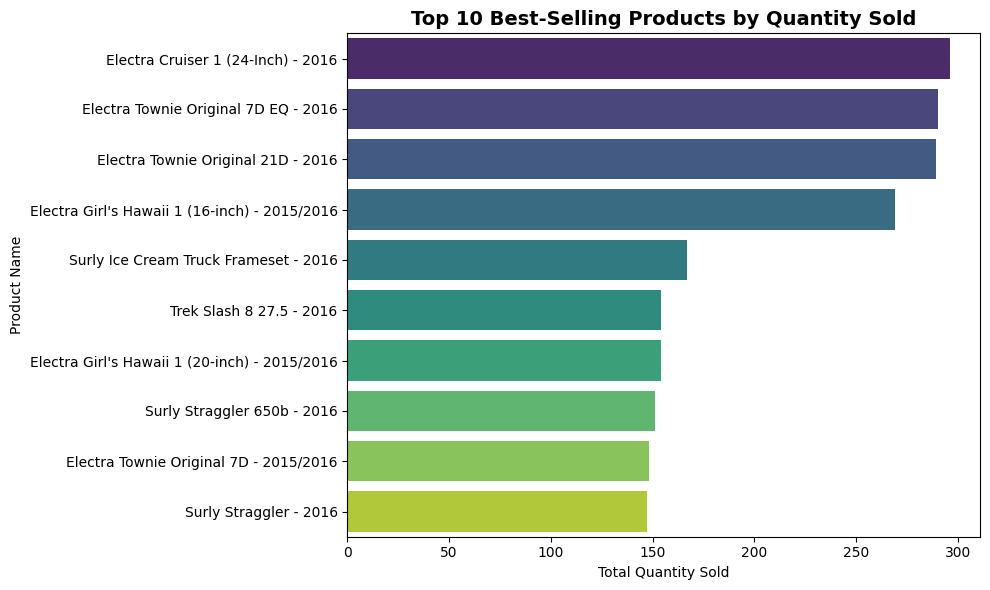

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top_selling_products,
    y="product_name",
    x="total_quantity_sold",
    hue="product_name",
    palette="viridis",
    legend=False
)
plt.title("Top 10 Best-Selling Products by Quantity Sold", fontsize=14, fontweight='bold')
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


<div style="background-color: #fffaf0; padding: 10px; border-left: 5px solid #f6ad55; border-radius: 6px; font-size: 14px;">

### 🛍️ Insight: Best-Selling Products

- **Electra Cruiser 1 (24-Inch)** leads with **296 units sold**, followed closely by other Electra models.
- Electra bikes dominate the list, reflecting strong customer preference for their casual and kids' bikes.
- A few premium models like **Trek Slash 8** and **Surly Straggler** also stand out, showing demand across price ranges.

</div>


<div style="background-color: #e6fffa; padding: 16px; border-left: 5px solid #38b2ac; border-radius: 6px; font-size: 14px;">

### 📦 Question 2: Which Categories Sold the Most Products?

Understanding which product categories generate the highest volume of sales can help the business prioritize inventory, promotions, and marketing strategies more effectively.

</div>


In [7]:
query_category_sales = """
SELECT 
    c.category_name,
    SUM(oi.quantity) AS total_quantity_sold,
    ROUND(
        SUM(oi.quantity) * 100.0 / 
        (SELECT SUM(quantity) FROM order_items), 
        2
    ) AS percentage_share
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN categories c ON p.category_id = c.category_id
GROUP BY c.category_name
ORDER BY total_quantity_sold DESC;

"""

df_category_sales = pd.read_sql(query_category_sales, engine)
df_category_sales


,category_name,total_quantity_sold,percentage_share
0,Cruisers Bicycles,2063.0,29.15
1,Mountain Bikes,1755.0,24.80
2,Children Bicycles,1179.0,16.66
3,Comfort Bicycles,813.0,11.49
4,Road Bikes,559.0,7.90
5,Cyclocross Bicycles,394.0,5.57
6,Electric Bikes,315.0,4.45


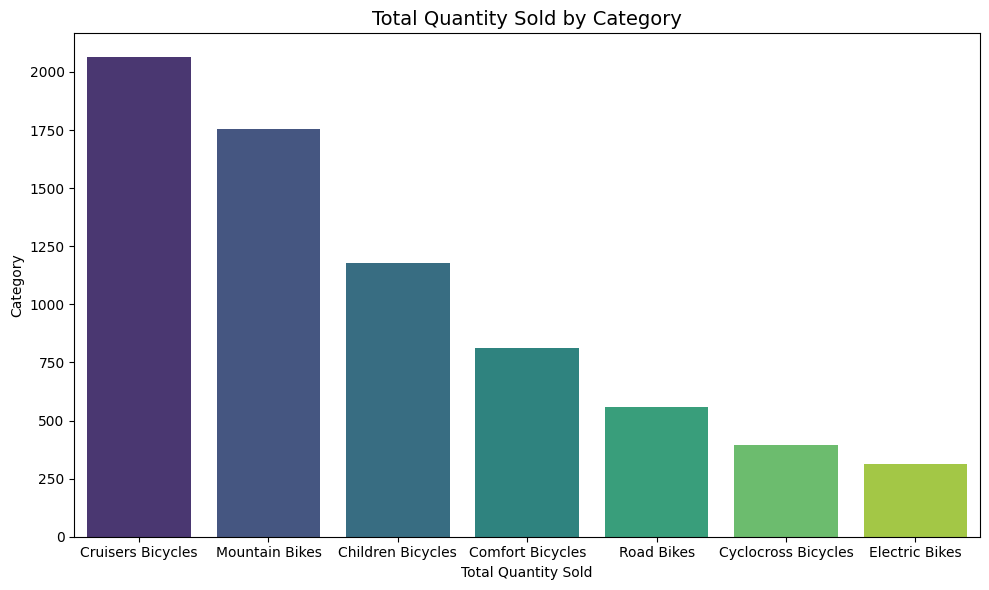

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_category_sales, 
    y='total_quantity_sold', 
    x='category_name',
    hue='category_name',
    palette='viridis'
)
plt.title('Total Quantity Sold by Category', fontsize=14)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

<div style="background-color: #fffaf0; padding: 10px; border-left: 5px solid #f6ad55; border-radius: 6px; font-size: 14px;">

### 💡 Insight: High-Demand Categories

- **Cruisers Bicycles** dominate with **2,063 units** sold, making them the top-selling category.
- **Mountain Bikes** and **Children Bicycles** follow with **1,755** and **1,179** units, respectively.
- These three categories together represent the majority of total sales.

</div>


<div style="background-color: #e6fffa; padding: 10px; border-left: 5px solid #38b2ac; border-radius: 6px; font-size: 14px;">

### 🏪 Question 3: Which stores sold the most products?

This analysis identifies which store location had the highest volume of product sales.

</div>


In [40]:
query_store_sales = """
SELECT 
    s.store_name,
    SUM(oi.quantity) AS total_quantity_sold
FROM order_items oi
JOIN orders o ON oi.order_id = o.order_id
JOIN stores s ON o.store_id = s.store_id
GROUP BY s.store_name
ORDER BY total_quantity_sold DESC;
"""

df_store_sales = pd.read_sql(query_store_sales, engine)
df_store_sales


,store_name,total_quantity_sold
0,Baldwin Bikes,4779.0
1,Santa Cruz Bikes,1516.0
2,Rowlett Bikes,783.0


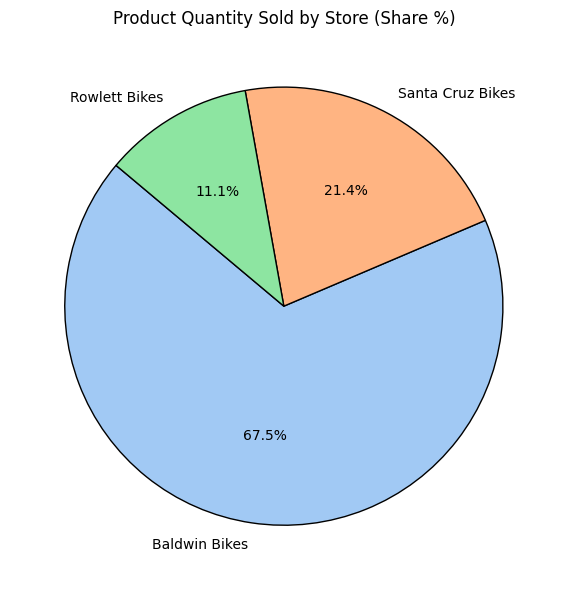

In [41]:
plt.figure(figsize=(6, 6))
plt.pie(
    df_store_sales['total_quantity_sold'],
    labels=df_store_sales['store_name'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Product Quantity Sold by Store (Share %)')
plt.tight_layout()
plt.show()


<div style="background-color: #fffaf0; padding: 10px; border-left: 5px solid #f6ad55; border-radius: 6px; font-size: 14px;">

### 🏆 Insight: Baldwin Bikes leads by a large margin

- **Baldwin Bikes** significantly outperforms others with **4,779 units sold**, showing it is the top-performing store.
- **Santa Cruz Bikes** and **Rowlett Bikes** trail behind with **1,516** and **783** units respectively.
- The gap highlights an opportunity to analyze what’s driving Baldwin's success and apply similar strategies to other locations.

</div>


<div style="background-color: #f0f9ff; padding: 10px; border-left: 5px solid #38bdf8; border-radius: 6px; font-size: 14px;">

### 📊 Q5. Who are the top 10 high-value customers (based on total spending)?

Understanding who your most valuable customers are helps the business focus on retention strategies, loyalty programs, and personalized marketing. These top spenders are likely to have a strong influence on overall revenue and brand advocacy.

</div>


In [42]:
query_top_customers = """
SELECT 
    CONCAT(c.first_name, ' ', c.last_name) AS customer_name,
    ROUND(SUM(oi.quantity * oi.list_price * (1 - oi.discount)), 2) AS total_spent
FROM order_items oi
JOIN orders o ON oi.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY customer_name
ORDER BY total_spent DESC
LIMIT 10;
"""

df_top_customers = pd.read_sql(query_top_customers, engine)
df_top_customers


,customer_name,total_spent
0,Sharyn Hopkins,34807.94
1,Pamelia Newman,33634.26
2,Abby Gamble,32803.01
3,Lyndsey Bean,32675.07
4,Emmitt Sanchez,31925.89
5,Melanie Hayes,31913.69
6,Debra Burks,27888.18
7,Elinore Aguilar,25636.45
8,Corrina Sawyer,25612.70
9,Shena Carter,24890.62


C:\Users\DELL\AppData\Local\Temp\ipykernel_18124\2568414606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_customers, y='customer_name', x='total_spent', palette='Blues_d')


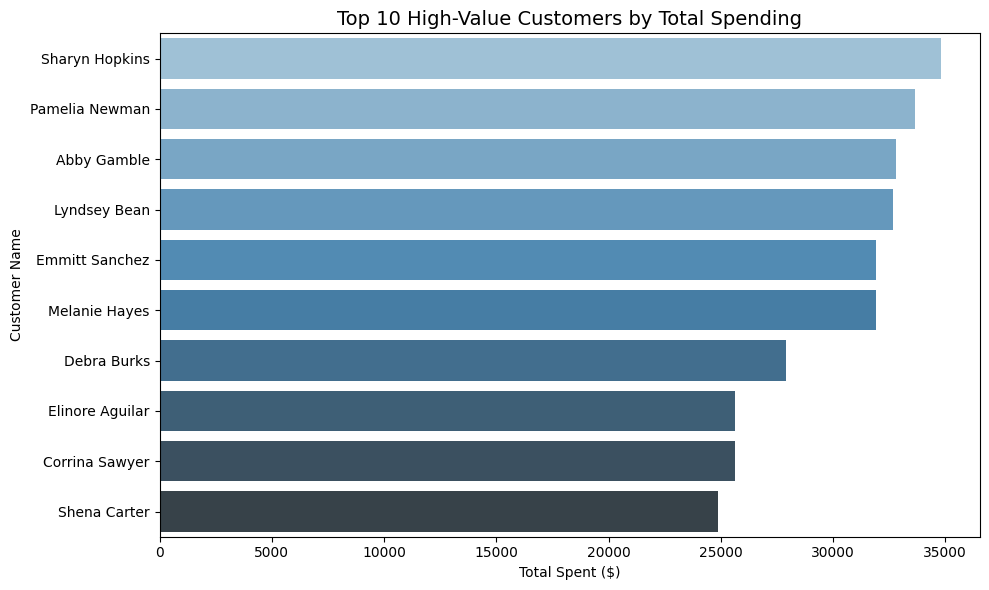

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_customers, y='customer_name', x='total_spent', palette='Blues_d')
plt.title('Top 10 High-Value Customers by Total Spending', fontsize=14)
plt.xlabel('Total Spent ($)')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()


<div style="background-color: #fffaf0; padding: 10px; border-left: 5px solid #f6ad55; border-radius: 6px; font-size: 14px;">

### 🧾 Insight: Top Spending Customers

- **Sharyn Hopkins** leads with over **$34K** in total spending, followed closely by **Pamelia Newman** and **Abby Gamble**.
- These top 10 customers represent a significant share of revenue and could benefit from targeted loyalty programs or exclusive deals.

</div>


<div style="background-color: #f0f9ff; padding: 10px; border-left: 5px solid #38bdf8; border-radius: 6px; font-size: 14px;">

### 💼 Q6. Which categories generate the highest revenue?

Analyzing revenue by category helps prioritize the most profitable segments, optimize marketing strategies, and make informed inventory decisions.

</div>


In [47]:
query_category_revenue = """
SELECT 
    c.category_name,
    ROUND(SUM(oi.quantity * oi.list_price * (1 - oi.discount)), 2) AS total_revenue
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN categories c ON p.category_id = c.category_id
GROUP BY c.category_name
ORDER BY total_revenue DESC;
"""

df_category_revenue = pd.read_sql(query_category_revenue, engine)
df_category_revenue


,category_name,total_revenue
0,Mountain Bikes,2715079.53
1,Road Bikes,1665098.49
2,Cruisers Bicycles,995032.62
3,Electric Bikes,916684.78
4,Cyclocross Bicycles,711011.84
5,Comfort Bicycles,394020.10
6,Children Bicycles,292189.20


C:\Users\DELL\AppData\Local\Temp\ipykernel_18124\1335423146.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


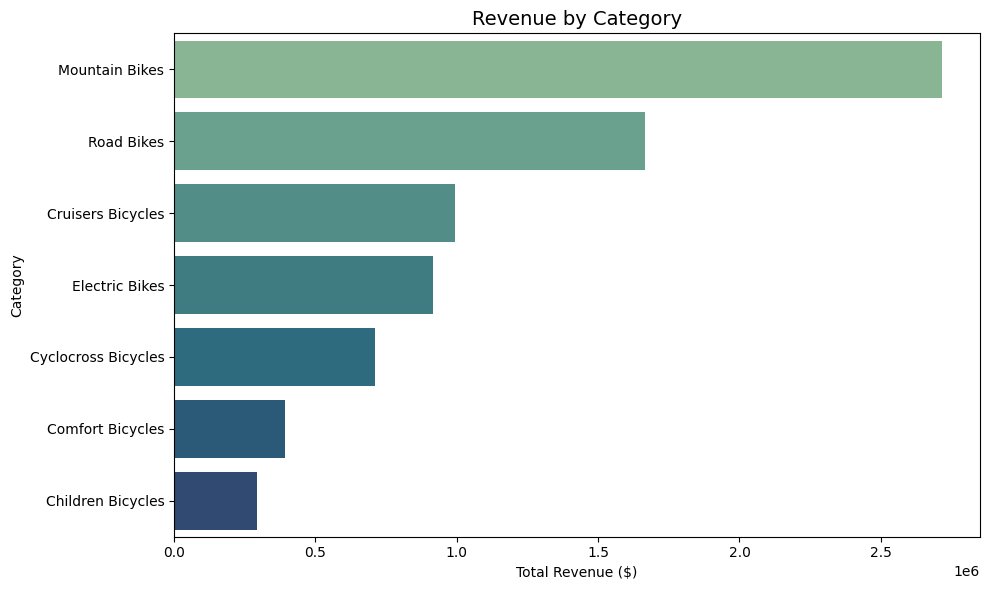

In [48]:
# Bar chart: Category-wise revenue

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_category_revenue,
    x="total_revenue",
    y="category_name",
    palette="crest"
)
plt.title("Revenue by Category", fontsize=14)
plt.xlabel("Total Revenue ($)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


<div style="background-color: #fffaf0; padding: 10px; border-left: 5px solid #f6ad55; border-radius: 6px; font-size: 14px;">

### 💡 Insight: Revenue Leaders by Category

**Mountain Bikes** dominate with over **$2.7M** in revenue, followed by **Road Bikes** and **Cruisers**, proving these are the most profitable segments to focus on.

</div>


<div style="background-color: #f0fdf4; padding: 10px; border-left: 5px solid #22c55e; border-radius: 6px; font-size: 14px;">

### 🧾 Q7. Which products have the highest discount rate and still sell well?

This analysis highlights the products that are frequently sold at a high discount **yet maintain strong sales volumes**. It helps identify items that may be popular due to their pricing strategy, useful for refining discount policies and promotions.

</div>


In [53]:
query_top_discounted_products = """
SELECT 
    p.product_name,
    ROUND(AVG(oi.discount) * 100, 2) AS avg_discount_percent,
    SUM(oi.quantity) AS total_quantity_sold
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_name
HAVING SUM(oi.quantity) > 100  -- Adjust threshold as needed
ORDER BY total_quantity_sold DESC
LIMIT 10;
"""

df_top_discounted_products = pd.read_sql(query_top_discounted_products, engine)
df_top_discounted_products


,product_name,avg_discount_percent,total_quantity_sold
0,Electra Cruiser 1 (24-Inch) - 2016,9.89,296.0
1,Electra Townie Original 7D EQ - 2016,10.49,290.0
2,Electra Townie Original 21D - 2016,9.88,289.0
3,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,11.05,269.0
4,Surly Ice Cream Truck Frameset - 2016,10.30,167.0
5,Trek Slash 8 27.5 - 2016,9.92,154.0
6,Electra Girl's Hawaii 1 (20-inch) - 2015/2016,11.05,154.0
7,Surly Straggler 650b - 2016,11.10,151.0
8,Electra Townie Original 7D - 2015/2016,10.14,148.0
9,Surly Straggler - 2016,10.75,147.0


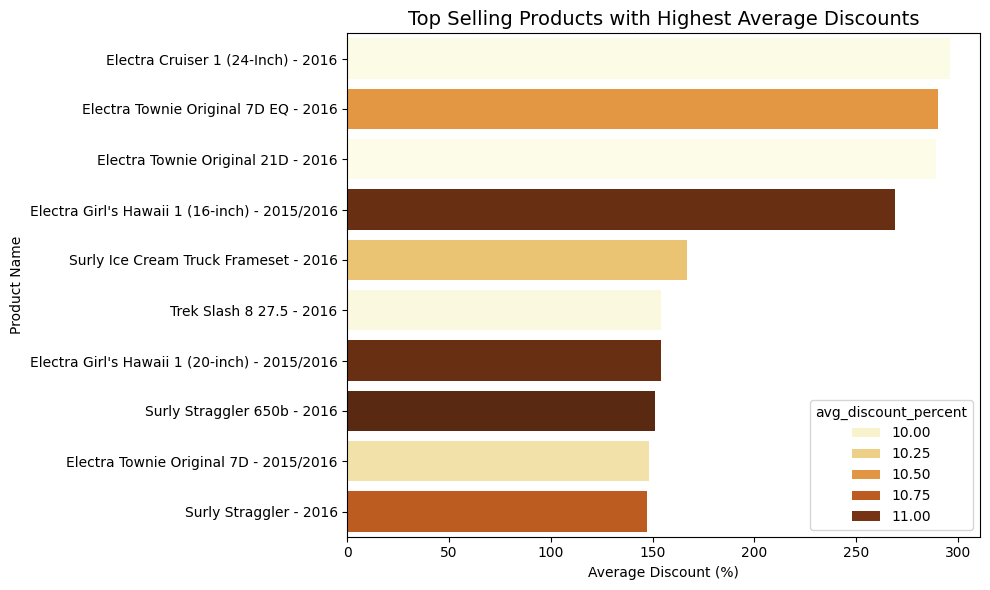

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top_discounted_products,
    x='total_quantity_sold',
    y='product_name',
    hue='avg_discount_percent',
    palette='YlOrBr'
)
plt.title('Top Selling Products with Highest Average Discounts', fontsize=14)
plt.xlabel('Average Discount (%)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


<div style="background-color: #fffaf0; padding: 10px; border-left: 5px solid #facc15; border-radius: 6px; font-size: 14px;">

### 💡 Insight

Many high-selling products, like the **Electra Cruiser** and **Surly Straggler 650b**, offer **9.8–11% discounts**, showing that moderate discounts can effectively drive strong sales without heavily impacting margins.

</div>


<div style="background-color: #f0f9ff; padding: 10px; border-left: 5px solid #38bdf8; border-radius: 6px; font-size: 14px;">

### 📊 Q8. Which staff members have processed the most orders or generated the highest revenue?

Understanding staff performance helps in recognizing top performers and aligning training or incentives accordingly. This also supports workforce optimization and better resource allocation.

</div>


In [59]:
query_staff_performance = """
SELECT 
    CONCAT(s.first_name, ' ', s.last_name) AS staff_name,
    COUNT(o.order_id) AS total_orders_processed,
    ROUND(SUM(oi.quantity * oi.list_price * (1 - oi.discount)), 2) AS total_revenue_generated
FROM staffs s
JOIN orders o ON s.staff_id = o.staff_id
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY staff_name
ORDER BY total_revenue_generated DESC;
"""

df_staff_performance = pd.read_sql(query_staff_performance, engine)
df_staff_performance


,staff_name,total_orders_processed,total_revenue_generated
0,Marcelene Boyer,1615,2624120.65
1,Venita Daniel,1580,2591630.62
2,Genna Serrano,544,853287.36
3,Mireya Copeland,462,752535.68
4,Kali Vargas,269,463918.30
5,Layla Terrell,252,403623.94


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


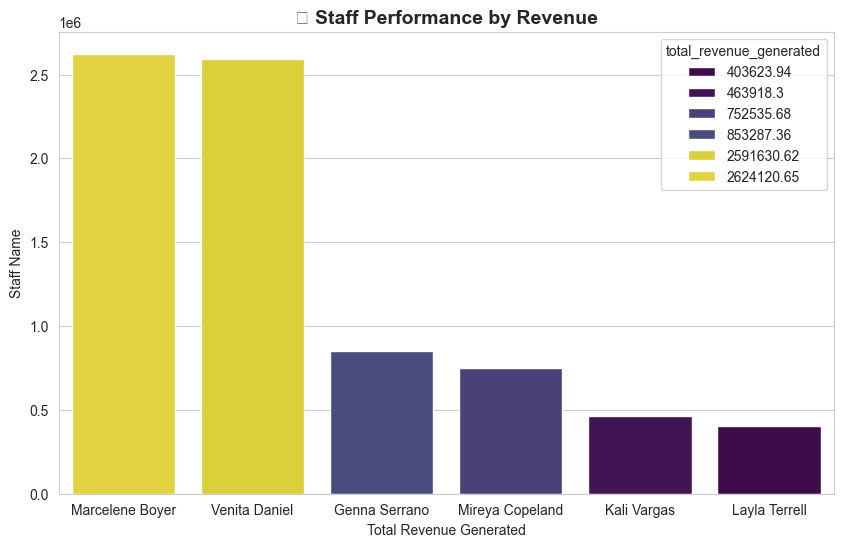

In [65]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(
    data=df_staff_performance,
    y="total_revenue_generated", 
    x="staff_name",
    hue="total_revenue_generated",
    palette="viridis"
)

# Titles and labels
plt.title("💼 Staff Performance by Revenue", fontsize=14, weight='bold')
plt.xlabel("Total Revenue Generated")
plt.ylabel("Staff Name")

plt.show()

<div style="background-color: #fffaf0; padding: 10px; border-left: 5px solid #facc15; border-radius: 6px; font-size: 14px;">

### 📌 Insight: Staff Performance Based on Orders and Revenue

From the data, **Marcelene Boyer** and **Venita Daniel** stand out as top-performing staff members, each processing over **1,500 orders** and generating more than **2.6 million in revenue**. These two individuals are driving a significant portion of total sales, making them valuable assets to the company.

On the other end, staff like **Layla Terrell** and **Kali Vargas** have processed fewer orders and generated lower revenue. This disparity could be due to experience, store location, or product mix—factors worth exploring for performance optimization or training opportunities.

</div>


<div style="background-color: #f0f9ff; padding: 10px; border-left: 5px solid #eab308; border-radius: 6px; font-size: 14px;">

### 📦 Q9. What is the average order value per customer?

Understanding the average order value (AOV) per customer helps measure purchasing behavior and sales effectiveness. It can also guide upselling strategies and highlight opportunities to increase revenue through improved product bundling or promotions.

</div>


In [66]:
query_avg_order_value = """
SELECT 
    c.customer_id,
    CONCAT(c.first_name, ' ', c.last_name) AS customer_name,
    COUNT(DISTINCT o.order_id) AS total_orders,
    ROUND(SUM(oi.quantity * oi.list_price * (1 - oi.discount)), 2) AS total_spent,
    ROUND(SUM(oi.quantity * oi.list_price * (1 - oi.discount)) / COUNT(DISTINCT o.order_id), 2) AS avg_order_value
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY c.customer_id, customer_name
ORDER BY avg_order_value DESC
LIMIT 10;
"""

df_avg_order_value = pd.read_sql(query_avg_order_value, engine)
df_avg_order_value


,customer_id,customer_name,total_orders,total_spent,avg_order_value
0,122,Shena Carter,1,24890.62,24890.62
1,1224,Abram Copeland,1,24607.03,24607.03
2,1214,Brigid Sharp,1,20648.95,20648.95
3,425,Augustina Joyner,1,20509.43,20509.43
4,238,Cindi Larson,1,20177.75,20177.75
5,1023,Adena Blake,1,19329.95,19329.95
6,464,Bess Mcbride,1,18853.35,18853.35
7,1100,Penny Acevedo,1,18670.93,18670.93
8,227,Danielle Bond,1,18553.73,18553.73
9,108,Shae Hickman,1,18281.47,18281.47


C:\Users\DELL\AppData\Local\Temp\ipykernel_18124\3316873806.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_18124\3316873806.py:11: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


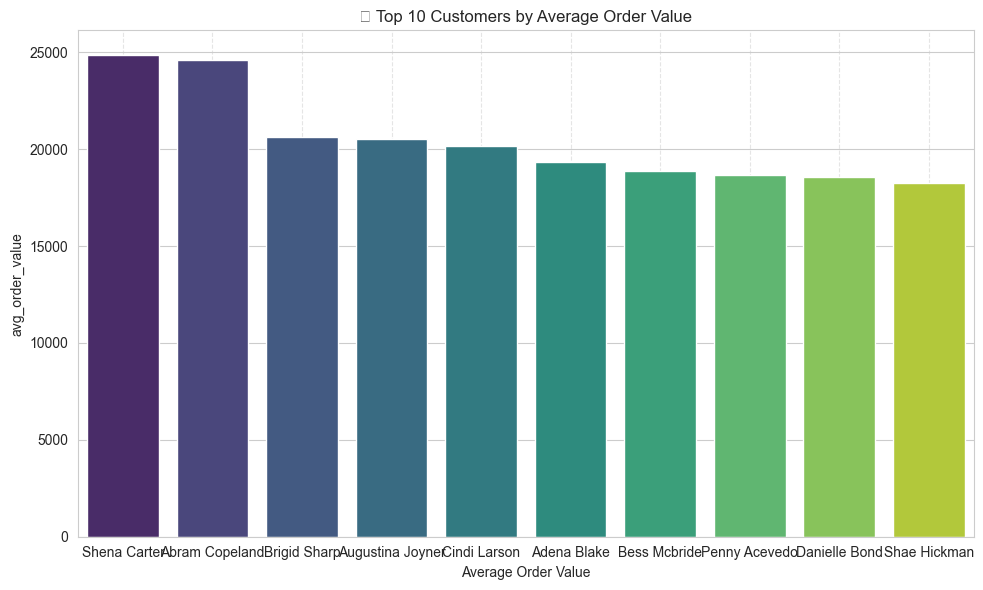

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_avg_order_value,
    x='customer_name',
    y='avg_order_value',
    palette='viridis'
)
plt.xlabel("Average Order Value")
plt.title("💰 Top 10 Customers by Average Order Value")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div style="background-color: #fffaf0; padding: 10px; border-left: 5px solid #38bdf8; border-radius: 6px; font-size: 14px;">

### 💡 Insight: Average Order Value per Customer

All top 10 customers have placed only **one order each**, yet their **average order values exceed ₹18,000**, highlighting **high-value one-time buyers**. These customers are crucial for targeted premium offerings or upselling strategies.

</div>


<div style="background-color: #f0f9ff; padding: 10px; border-left: 5px solid #eab308; border-radius: 6px; font-size: 14px;">

### 📦 Q10. What is the cancellation/return rate per category?

Understanding the cancellation or return rate per category helps identify product lines that may have quality issues, delivery problems, or customer dissatisfaction. This insight supports operational improvements and targeted quality control.

</div>


In [78]:
query_cancellation_rate_per_category = """
SELECT 
    c.category_id,
    c.category_name,
    COUNT(DISTINCT CASE WHEN o.order_status = 3 THEN o.order_id END) AS cancelled_orders,
    COUNT(DISTINCT o.order_id) AS total_orders,
    ROUND(
        100.0 * COUNT(DISTINCT CASE WHEN o.order_status = 3 THEN o.order_id END) / NULLIF(COUNT(DISTINCT o.order_id), 0)
    , 2) AS cancellation_rate_pct
FROM categories c
JOIN products p ON c.category_id = p.category_id
JOIN order_items oi ON p.product_id = oi.product_id
JOIN orders o ON oi.order_id = o.order_id
GROUP BY c.category_id, c.category_name
ORDER BY cancellation_rate_pct DESC;
"""

df_cancellation_rate_per_category = pd.read_sql(query_cancellation_rate_per_category, engine)
df_cancellation_rate_per_category


,category_id,category_name,cancelled_orders,total_orders,cancellation_rate_pct
0,7,Road Bikes,12,315,3.81
1,5,Electric Bikes,7,202,3.47
2,3,Cruisers Bicycles,31,959,3.23
3,6,Mountain Bikes,22,866,2.54
4,2,Comfort Bicycles,10,472,2.12
5,1,Children Bicycles,13,635,2.05
6,4,Cyclocross Bicycles,5,245,2.04


C:\Users\DELL\AppData\Local\Temp\ipykernel_18124\3552994267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


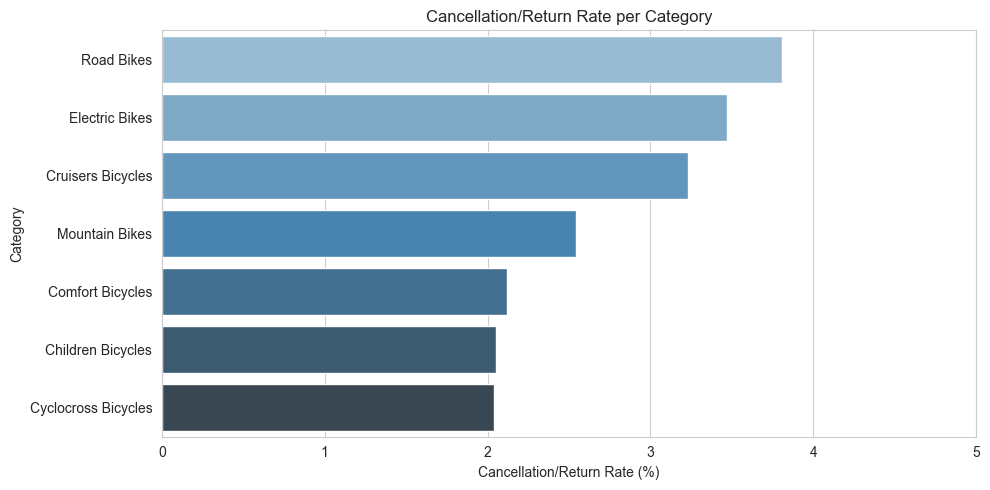

In [81]:
plt.figure(figsize=(10,5))
sns.barplot(
    x="cancellation_rate_pct", 
    y="category_name", 
    data=df_cancellation_rate_per_category, 
    palette="Blues_d"
)
plt.xlabel("Cancellation/Return Rate (%)")
plt.ylabel("Category")
plt.title("Cancellation/Return Rate per Category")
plt.xlim(0, max(df_cancellation_rate_per_category["cancellation_rate_pct"].max(), 5))  # Ensure x-axis starts at 0 for clarity
plt.tight_layout()
plt.show()

<div style="background-color: #fffaf0; padding: 10px; border-left: 5px solid #38bdf8; border-radius: 6px; font-size: 14px;">

### 💡 Insight: Cancellation/Return Rate per Category (Summary)

Cancellation rates vary by category, with **Road Bikes (3.81%)** and **Electric Bikes (3.47%)** having the highest rates. These categories may need attention to improve customer satisfaction and reduce returns. Other categories maintain lower but notable rates around 2%, indicating generally good performance but room for improvement.

</div>


<div style="background-color: #f0f9ff; padding: 10px; border-left: 5px solid #eab308; border-radius: 6px; font-size: 14px;">

### 📦 Q11. Which products are low in stock and high in sales (fast-moving)?

Identifying fast-moving products that are low in stock helps prioritize restocking and ensures high-demand items are always available. This is essential for maximizing sales and maintaining customer satisfaction.

</div>


In [83]:
query_fast_moving_products = """
SELECT 
    p.product_id,
    p.product_name,
    st.quantity AS stock_left,
    SUM(oi.quantity) AS total_quantity_sold
FROM products p
JOIN stocks st ON p.product_id = st.product_id
JOIN order_items oi ON p.product_id = oi.product_id
GROUP BY p.product_id, p.product_name, st.quantity
HAVING stock_left < 20 AND total_quantity_sold > 100
ORDER BY stock_left ASC, total_quantity_sold DESC;
"""

df_fast_moving_products = pd.read_sql(query_fast_moving_products, engine)
df_fast_moving_products


,product_id,product_name,stock_left,total_quantity_sold
0,6,Surly Ice Cream Truck Frameset - 2016,0,167.0
1,22,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,0,145.0
2,3,Surly Wednesday Frameset - 2016,0,126.0
3,8,Trek Remedy 29 Carbon Frameset - 2016,0,125.0
4,13,Electra Cruiser 1 (24-Inch) - 2016,1,157.0
5,5,Heller Shagamaw Frame - 2016,1,129.0
6,8,Trek Remedy 29 Carbon Frameset - 2016,1,125.0
7,12,Electra Townie Original 21D - 2016,2,153.0
8,4,Trek Fuel EX 8 29 - 2016,2,143.0
9,26,Electra Townie Original 7D EQ - 2016,2,134.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_18124\111655840.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


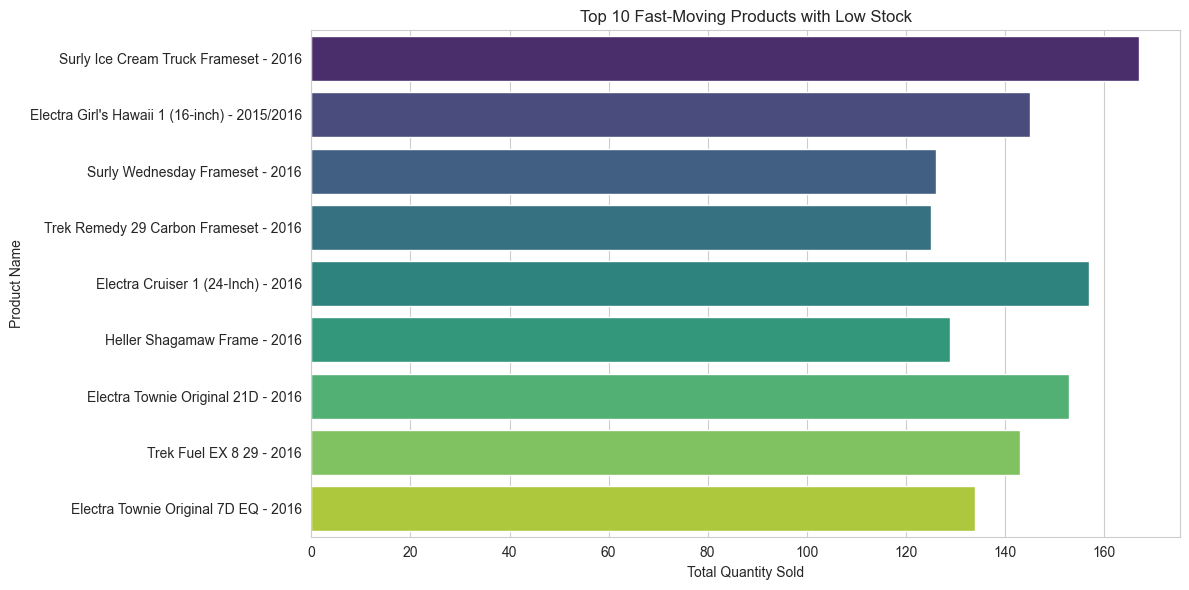

In [87]:
df_top10_fast_moving = df_fast_moving_products.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='total_quantity_sold', 
    y='product_name', 
    data=df_top10_fast_moving, 
    palette='viridis'
)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.title('Top 10 Fast-Moving Products with Low Stock')
plt.tight_layout()
plt.show()

<div style="background-color: #fffaf0; padding: 10px; border-left: 5px solid #38bdf8; border-radius: 6px; font-size: 14px;">

### 💡 Insight: Fast-Moving, Low-Stock Products

All top 10 products have **sold over 120 units** each, but now have **0–2 items left in stock**. This highlights extremely fast-moving inventory:
- **Immediate restocking is suggested** for these products to avoid missed sales opportunities.
- High sales velocity indicates strong customer demand—these items should be prioritized in future inventory planning.

</div>


<div style="background-color: #f0f9ff; padding: 10px; border-left: 5px solid #eab308; border-radius: 6px; font-size: 14px;">

### 📦 Q12. Which are the top 5 customers by total purchase value?

Identifying the top 5 customers by total purchase value helps recognize your most valuable clients. This information is vital for personalized engagement, loyalty programs, and targeted premium offers to drive retention and growth.

</div>


In [91]:
query_top_customers = """
SELECT 
    c.customer_id,
    CONCAT(c.first_name, ' ', c.last_name) AS customer_name,
    ROUND(SUM(oi.quantity * oi.list_price * (1 - oi.discount)), 2) AS total_purchase_value
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY c.customer_id, customer_name
ORDER BY total_purchase_value DESC
LIMIT 5;
"""

df_top_customers = pd.read_sql(query_top_customers, engine)
df_top_customers


,customer_id,customer_name,total_purchase_value
0,94,Sharyn Hopkins,34807.94
1,10,Pamelia Newman,33634.26
2,75,Abby Gamble,32803.01
3,6,Lyndsey Bean,32675.07
4,16,Emmitt Sanchez,31925.89


C:\Users\DELL\AppData\Local\Temp\ipykernel_18124\3418295403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


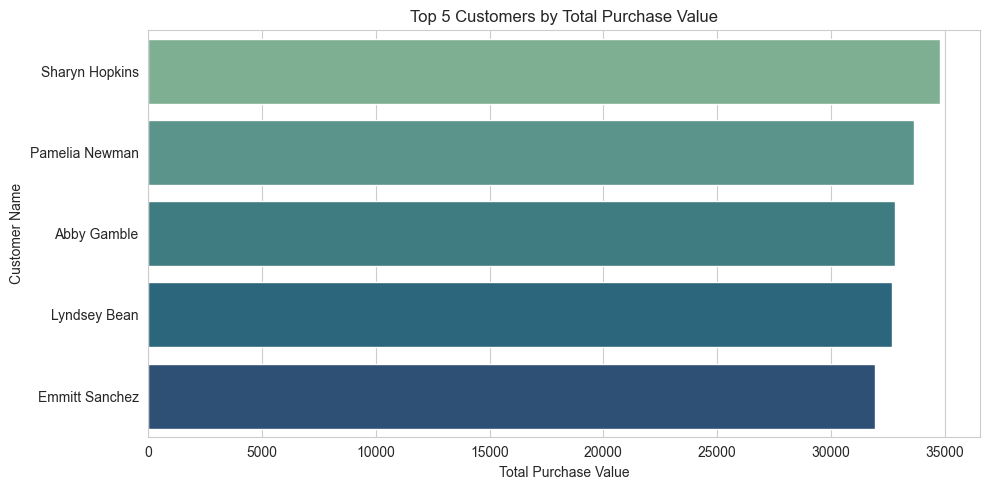

In [92]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='total_purchase_value',
    y='customer_name',
    data=df_top_customers,      # Use your existing SQL result DataFrame
    palette='crest'
)
plt.xlabel('Total Purchase Value')
plt.ylabel('Customer Name')
plt.title('Top 5 Customers by Total Purchase Value')
plt.tight_layout()
plt.show()


<div style="background-color: #fffaf0; padding: 10px; border-left: 5px solid #38bdf8; border-radius: 6px; font-size: 14px;">

### 💡 Insight: Top 5 Customers by Purchase Value

The top 5 customers have each contributed between **₹31,900 and ₹34,800** in total purchases. *Sharyn Hopkins* is the highest spender, followed closely by *Pamelia Newman* and *Abby Gamble*. These high-value customers are ideal candidates for loyalty rewards or premium engagement strategies to maximize lifetime value and advocacy.

</div>


<div style="background-color: #f0f9ff; padding: 10px; border-left: 5px solid #eab308; border-radius: 6px; font-size: 14px;">

### 📦 Q13. How many new customers joined each month?

Tracking the number of new customers each month helps evaluate business growth trends and the effectiveness of marketing or acquisition campaigns over time.

</div>


In [5]:
query_new_customers_per_month = """
SELECT
    YEAR(first_order_date) AS join_year,
    MONTH(first_order_date) AS join_month,
    COUNT(*) AS new_customers
FROM (
    SELECT
        c.customer_id,
        MIN(o.order_date) AS first_order_date
    FROM customers c
    JOIN orders o ON c.customer_id = o.customer_id
    GROUP BY c.customer_id
) AS first_orders
GROUP BY YEAR(first_order_date), MONTH(first_order_date)
ORDER BY join_year, join_month;

"""

df_new_customers_per_month = pd.read_sql(query_new_customers_per_month, engine)
df_new_customers_per_month


,join_year,join_month,new_customers
0,2016,1,50
1,2016,2,49
2,2016,3,55
3,2016,4,42
4,2016,5,51
5,2016,6,45
6,2016,7,49
7,2016,8,62
8,2016,9,64
9,2016,10,64


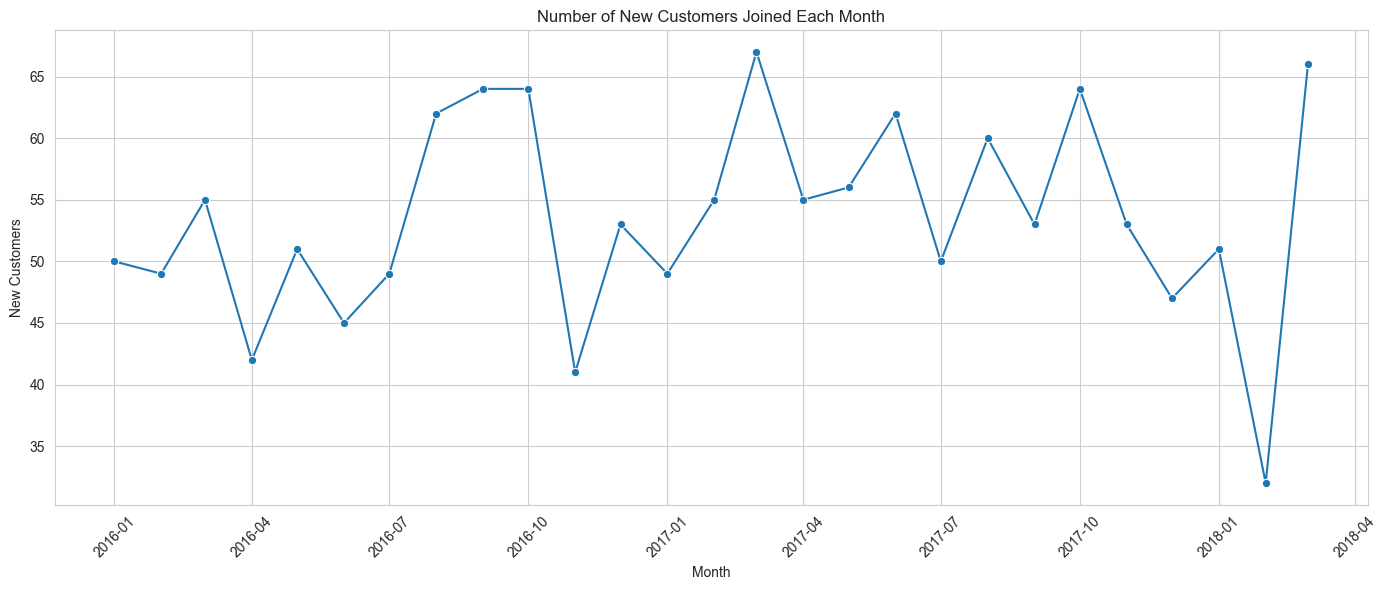

In [96]:
plt.figure(figsize=(14, 6))
# Build a datetime axis for plotting
df_new_customers_per_month['join_month_year'] = pd.to_datetime(
    df_new_customers_per_month['join_year'].astype(str) + '-' + df_new_customers_per_month['join_month'].astype(str) + '-01'
)

sns.lineplot(
    x='join_month_year',
    y='new_customers',
    data=df_new_customers_per_month,
    marker='o'
)
plt.xlabel('Month')
plt.ylabel('New Customers')
plt.title('Number of New Customers Joined Each Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<div style="background-color: #fffaf0; padding: 10px; border-left: 5px solid #38bdf8; border-radius: 6px; font-size: 14px;">

### 💡 Insight: Monthly New Customer Acquisition

Customer acquisition remained strong and steady, ranging from about **32 to 67 new customers per month**. The highest upticks occurred in **March 2017 and March 2018**, both exceeding **65 new signups**. These seasonal spikes may be linked to promotional periods or market events, suggesting such campaigns drive effective growth. Continuous monthly gains reflect consistent business expansion.

</div>


------

<div style="background-color: #f0f9ff; padding: 16px; border-left: 6px solid #6366f1; border-radius: 7px; font-size: 15px;">

## 🚴‍♂️ Overall Project Summary and Insights

This comprehensive analysis of the bike sales dataset reveals essential patterns in product performance, customer behavior, store success, and business growth, offering actionable strategies for future operations.

**Product and Category Insights:**
- **Electra** bikes, especially casual and kids’ models, are top-sellers—showing strong brand loyalty and broad demand.
- **Cruisers, Mountain Bikes, and Children Bicycles** together make up the majority of product sales. For revenue, **Mountain Bikes** and **Road Bikes** are clear leaders, justifying focused marketing and inventory efforts.
- Moderate discounts (9–11%) help drive sales without severely impacting profit margins.
- Several fast-moving products are now critically low in stock—urgent restocking is needed to meet ongoing demand.

**Customer and Channel Findings:**
- **Baldwin Bikes** is the standout retail performer, far ahead in sales volume. Other locations can learn from its operational strategies.
- The top customers (e.g., *Sharyn Hopkins*, *Pamelia Newman*) make significant contributions to overall revenue and are prime targets for tailored loyalty offers.
- High average order values, even among one-time buyers, suggest further potential for upselling and additional premium offerings.
- **Road and Electric Bikes** have the highest cancellation/return rates (~4%), indicating these categories need improved after-sales handling or quality interventions.

**Growth and Operational Trends:**
- Monthly new customer signups remain consistent, ranging from the low 30s to upper 60s—with clear spikes during marketing campaigns, especially in March.
- Outstanding staff performance has been pinpointed, informing where to focus incentives or training programs for maximum team impact.

**Strategic Takeaways:**
- **Maintain stock on all best-sellers, especially Electra models and Mountain Bikes, to prevent missed sales.**
- **Address quality or satisfaction issues for Road and Electric Bikes—a small improvement here could meaningfully increase overall customer satisfaction.**
- **Nurture top spenders and high-value one-time buyers to unlock more value through loyalty programs.**
- **Replicate the Baldwin Bikes store model elsewhere for widespread sales gains.**
- **Scale up effective marketing campaigns during proven high-growth months for sustained customer acquisition.**

These insights enable smarter inventory management, sharper marketing investments, better customer retention, and robust revenue growth in a competitive landscape.

</div>
